# 데이터 수집

### FinanceDataReader 라이브러리 설치

In [2]:
!pip install -U finance-datareader

  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     -------------------- ----------------- 30.7/57.6 kB 660.6 kB/s eta 0:00:01
     -------------------------------------- 57.6/57.6 kB 763.1 kB/s eta 0:00:00
  Using cached charset_normalizer-3.3.2-cp311-cp311-win_amd64.whl.metadata (34 kB)
  Using cached idna-3.7-py3-none-any.whl.metadata (9.9 kB)
  Using cached urllib3-2.2.2-py3-none-any.whl.metadata (6.4 kB)
   ---------------------------------------- 0.0/89.0 kB ? eta -:--:--
   ---------------------------------------- 89.0/89.0 kB 2.5 MB/s eta 0:00:00
Using cached requests-2.32.3-py3-none-any.whl (64 kB)
   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   ---- ----------------------------------- 0.4/3.8 MB 8.5 MB/s eta 0:00:01
   ------------ --------------------------- 1.2/3.8 MB 13.0 MB/s eta 0:00:01


In [5]:
!pip install bs4

   ---------------------------------------- 0.0/17.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/17.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/17.3 MB 660.6 kB/s eta 0:00:27
   - -------------------------------------- 0.5/17.3 MB 6.0 MB/s eta 0:00:03
   ---- ----------------------------------- 1.8/17.3 MB 14.4 MB/s eta 0:00:02
   ------- -------------------------------- 3.3/17.3 MB 19.3 MB/s eta 0:00:01
   ----------- ---------------------------- 4.9/17.3 MB 22.4 MB/s eta 0:00:01
   --------------- ------------------------ 6.9/17.3 MB 26.0 MB/s eta 0:00:01
   -------------------- ------------------- 8.8/17.3 MB 28.1 MB/s eta 0:00:01
   ------------------------ --------------- 10.7/17.3 MB 36.4 MB/s eta 0:00:01
   ----------------------------- ---------- 12.8/17.3 MB 40.9 MB/s eta 0:00:01
   ----------------------------------- ---- 15.2/17.3 MB 40.9 MB/s eta 0:00:01
   ---------------------------------------  17.3/17.3 MB 40.9 MB/s eta 0:00:0

   ---------------------------------------- 0.0/147.9 kB ? eta -:--:--
   -- ------------------------------------- 10.2/147.9 kB ? eta -:--:--
   ---------- ---------------------------- 41.0/147.9 kB 653.6 kB/s eta 0:00:01
   ---------------------------------------- 147.9/147.9 kB 1.8 MB/s eta 0:00:00


In [ ]:
!pip install scikit-learn

In [ ]:
!pip install matplotlib

In [35]:
import FinanceDataReader as fdr
import pandas as pd
import numpy as np

### 삼성전자 주가 가져오기

In [26]:
df = fdr.DataReader('005930', '2014-07-01', '2024-07-26')#['Close']
df.info()
# df.tail(50)
# df.plot()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2479 entries, 2014-07-01 to 2024-07-26
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2479 non-null   int64  
 1   High    2479 non-null   int64  
 2   Low     2479 non-null   int64  
 3   Close   2479 non-null   int64  
 4   Volume  2479 non-null   int64  
 5   Change  2479 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 135.6 KB


In [27]:
# 기간 필터링
demands = df.loc[(df.index >= '2022-03-01') & (df.index <= '2024-07-19'), 'Close']
demands.info()
demands

test_demands = df.loc[(df.index >= '2024-07-22') & (df.index <= '2024-07-26'), 'Close']
test_demands.info()
test_demands

<class 'pandas.core.series.Series'>
DatetimeIndex: 589 entries, 2022-03-02 to 2024-07-19
Series name: Close
Non-Null Count  Dtype
--------------  -----
589 non-null    int64
dtypes: int64(1)
memory usage: 9.2 KB
<class 'pandas.core.series.Series'>
DatetimeIndex: 5 entries, 2024-07-22 to 2024-07-26
Series name: Close
Non-Null Count  Dtype
--------------  -----
5 non-null      int64
dtypes: int64(1)
memory usage: 80.0 bytes


Date
2024-07-22    83000
2024-07-23    83900
2024-07-24    82000
2024-07-25    80400
2024-07-26    80900
Name: Close, dtype: int64

### 전처리

In [ ]:
# min max
# https://wikidocs.net/173005 2-2. 데이터 전처리 - MinMaxScaler 2-4. 훈련 데이터와 테스트 데이터를 분리

### Moving average 구하기

In [30]:
# rolling https://wikidocs.net/152788

# demands.rolling(window=3).sum()
# demands.rolling(window=3).mean()
ma3 = demands.rolling(window=3, min_periods=1).mean()
ma3
ma20 = demands.rolling(window=20, min_periods=1).mean()
ma60 = demands.rolling(window=60, min_periods=1).mean()

### 시각화

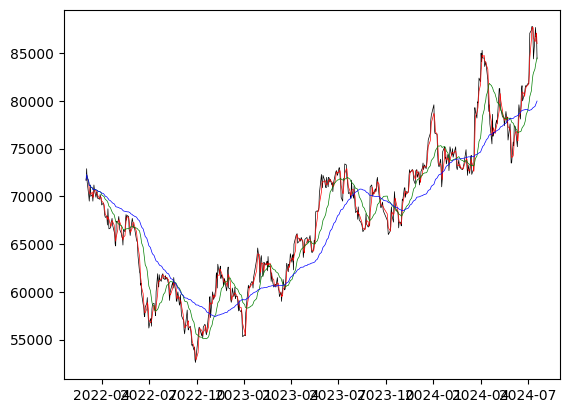

In [31]:
import matplotlib.pyplot as plt

plt.plot(demands, label='actual', linestyle='solid', color='black', linewidth=0.5)
plt.plot(ma3, label='ma3', linestyle='solid', color='red', linewidth=0.5)
plt.plot(ma20, label='ma20', linestyle='solid', color='green', linewidth=0.5)
plt.plot(ma60, label='ma60', linestyle='solid', color='blue', linewidth=0.5)

plt.show()

###  일주일 (test_demand) 예측해보기

In [61]:
window_size = 3
windows = demands.tail(window_size).values
predicts = []
for i in range(len(test_demands)):
    p = np.mean(windows[-3:])
    predicts.append(int(p))
    windows = np.append(windows, p)
print(f'predicts: {predicts}')
print(f'test_demands: {test_demands.to_list()}')

predicts: [86000, 85766, 85388, 85718, 85624]
test_demands: [83000, 83900, 82000, 80400, 80900]


### 평가

1. MA의 평가방법
오늘 계산 값은 내일의 예측값 (20일 ma 값 -> 21일 act 값과 비교)

2. 지표
https://rfriend.tistory.com/667
MSE, MAE

In [18]:

for z in zip(demands[1:].to_list(), ma3[:-1].to_list()):
    print(z)

(72900, 71700.0)
(71500, 72300.0)
(70100, 72033.33333333333)
(69500, 71500.0)
(71200, 70366.66666666667)
(70000, 70266.66666666667)
(70200, 70233.33333333333)
(69500, 70466.66666666667)
(70400, 69900.0)
(71200, 70033.33333333333)
(70700, 70366.66666666667)
(69900, 70766.66666666667)
(70300, 70600.0)
(70500, 70300.0)
(69800, 70233.33333333333)
(69800, 70200.0)
(69700, 70033.33333333333)
(70200, 69766.66666666667)
(69900, 69900.0)
(69600, 69933.33333333333)
(69100, 69900.0)
(69300, 69533.33333333333)
(69200, 69333.33333333333)
(68500, 69200.0)
(68000, 69000.0)
(67800, 68566.66666666667)
(67900, 68100.0)
(67000, 67900.0)
(68700, 67566.66666666667)
(67500, 67866.66666666667)
(66600, 67733.33333333333)
(66700, 67600.0)
(67300, 66933.33333333333)
(67400, 66866.66666666667)
(67700, 67133.33333333333)
(67000, 67466.66666666667)
(66300, 67366.66666666667)
(66100, 67000.0)
(65000, 66466.66666666667)
(64800, 65800.0)
(67400, 65300.0)
(67300, 65733.33333333333)
(67500, 66500.0)
(67900, 67400.0)
(6

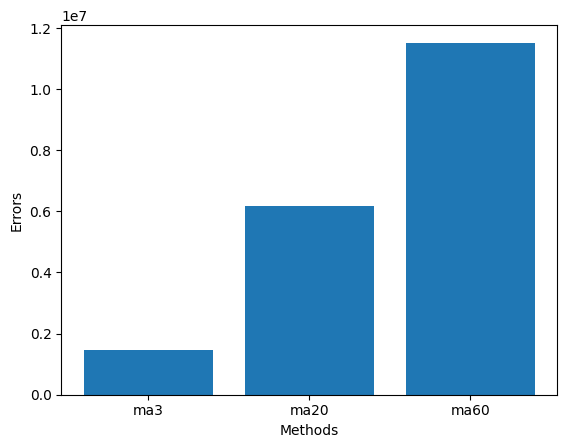

In [20]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE

y = [
MSE(demands[1:].to_list(), ma3[:-1].to_list()),
MSE(demands[1:].to_list(), ma20[:-1].to_list()),
MSE(demands[1:].to_list(), ma60[:-1].to_list())]

# y2 = [
# MAE(demands[1:].to_list(), ma3[:-1].to_list()),
# MAE(demands[1:].to_list(), ma20[:-1].to_list()),
# MAE(demands[1:].to_list(), ma60[:-1].to_list())]

plt.bar(['ma3', 'ma20', 'ma60'], y)
# plt.bar(['ma3', 'ma20', 'ma60'], y2)
plt.xlabel('Methods')
plt.ylabel('Errors')
plt.show()